# Part 1: Linear Regression with One Feature
## Stellar Luminosity Modeling

**Course**: Enterprise Architecture (AREP) - ML Bootcamp

**Objective**: Model stellar luminosity as a function of stellar mass using linear regression with an explicit bias term.

**Model**: $\hat{L} = w \cdot M + b$

Where:
- $M$: stellar mass (in solar mass units, $M_\odot$)
- $L$: stellar luminosity (in solar luminosity units, $L_\odot$)
- $w$: slope (weight parameter)
- $b$: intercept (bias parameter)


## 1. Dataset Visualization

We begin by defining our dataset and visualizing the relationship between stellar mass and luminosity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Configure plotting
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 10
np.set_printoptions(precision=4, suppress=True)

In [2]:
# Dataset: Stellar Mass (M_sun) vs Luminosity (L_sun)
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

m_samples = len(M)

print(f"Number of samples: {m_samples}")
print(f"\nStellar Mass (M_sun): {M}")
print(f"Luminosity (L_sun): {L}")

Number of samples: 10

Stellar Mass (M_sun): [0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
Luminosity (L_sun): [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


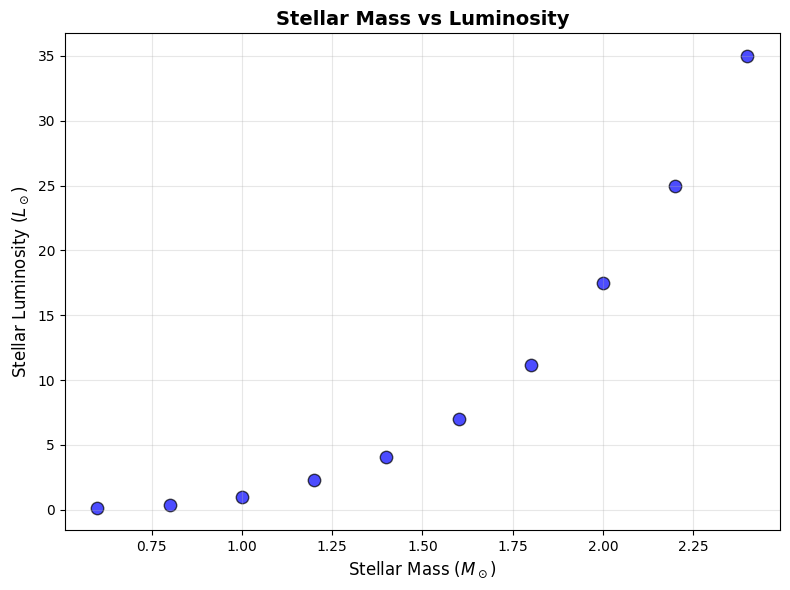


=== Analysis of Linearity ===
Observation: The relationship between mass and luminosity appears NON-LINEAR.
The luminosity increases rapidly (exponentially) with mass, not linearly.

Astrophysical Context:
- Main sequence stars follow approximately L ∝ M^3.5 (mass-luminosity relation)
- A linear model will provide a rough approximation but will have systematic errors
- Higher mass stars will be underestimated, lower mass stars may be overestimated


In [4]:
# Visualization: Mass vs Luminosity
plt.figure()
plt.scatter(M, L, color='blue', s=80, alpha=0.7, edgecolors='black')
plt.xlabel(r'Stellar Mass ($M_\odot$)', fontsize=12)
plt.ylabel(r'Stellar Luminosity ($L_\odot$)', fontsize=12)
plt.title('Stellar Mass vs Luminosity', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Analysis of Linearity ===")
print("Observation: The relationship between mass and luminosity appears NON-LINEAR.")
print("The luminosity increases rapidly (exponentially) with mass, not linearly.")
print("\nAstrophysical Context:")
print("- Main sequence stars follow approximately L ∝ M^3.5 (mass-luminosity relation)")
print("- A linear model will provide a rough approximation but will have systematic errors")
print("- Higher mass stars will be underestimated, lower mass stars may be overestimated")

## 2. Model and Loss Function

### Linear Regression Model

For a single feature, our hypothesis function is:

$$
\hat{L}^{(i)} = f_{w,b}(M^{(i)}) = w \cdot M^{(i)} + b
$$

### Mean Squared Error (MSE) Loss

We measure the quality of our model using the MSE cost function:

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{L}^{(i)} - L^{(i)} \right)^2
= \frac{1}{2m} \sum_{i=1}^{m} \left( w \cdot M^{(i)} + b - L^{(i)} \right)^2
$$

Where:
- $m$ is the number of training examples
- The factor $\frac{1}{2m}$ is for mathematical convenience when computing derivatives

In [5]:
def predict(M, w, b):
    """
    Compute predictions for stellar luminosity.

    Parameters:
    -----------
    M : np.ndarray
        Stellar mass values
    w : float
        Weight (slope)
    b : float
        Bias (intercept)

    Returns:
    --------
    np.ndarray
        Predicted luminosity values
    """
    return w * M + b


def compute_cost(M, L, w, b):
    """
    Compute the Mean Squared Error cost function.

    Parameters:
    -----------
    M : np.ndarray
        Stellar mass values
    L : np.ndarray
        Actual luminosity values
    w : float
        Weight (slope)
    b : float
        Bias (intercept)

    Returns:
    --------
    float
        Cost J(w, b)
    """
    m = len(M)
    predictions = predict(M, w, b)
    errors = predictions - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost


# Test the functions with initial parameters
w_init = 0.0
b_init = 0.0

L_pred_init = predict(M, w_init, b_init)
cost_init = compute_cost(M, L, w_init, b_init)

print("=== Initial Model Test (w=0, b=0) ===")
print(f"Predictions: {L_pred_init}")
print(f"Initial Cost J(0, 0) = {cost_init:.4f}")

=== Initial Model Test (w=0, b=0) ===
Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Initial Cost J(0, 0) = 117.6968


## 3. Cost Surface Visualization (3D and Contour)

To understand the optimization landscape, we visualize the cost function $J(w, b)$ over a grid of parameter values.

The minimum of this surface represents the optimal parameters that best fit our data.

In [6]:
# Create a grid of w and b values
w_range = np.linspace(0, 30, 100)
b_range = np.linspace(-10, 10, 100)
W_grid, B_grid = np.meshgrid(w_range, b_range)

# Compute cost for each (w, b) pair
J_grid = np.zeros_like(W_grid)

for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        J_grid[i, j] = compute_cost(M, L, W_grid[i, j], B_grid[i, j])

print("Cost surface computed successfully.")
print(f"Minimum cost in grid: {np.min(J_grid):.4f}")
print(f"Maximum cost in grid: {np.max(J_grid):.4f}")

Cost surface computed successfully.
Minimum cost in grid: 12.7929
Maximum cost in grid: 1029.4068


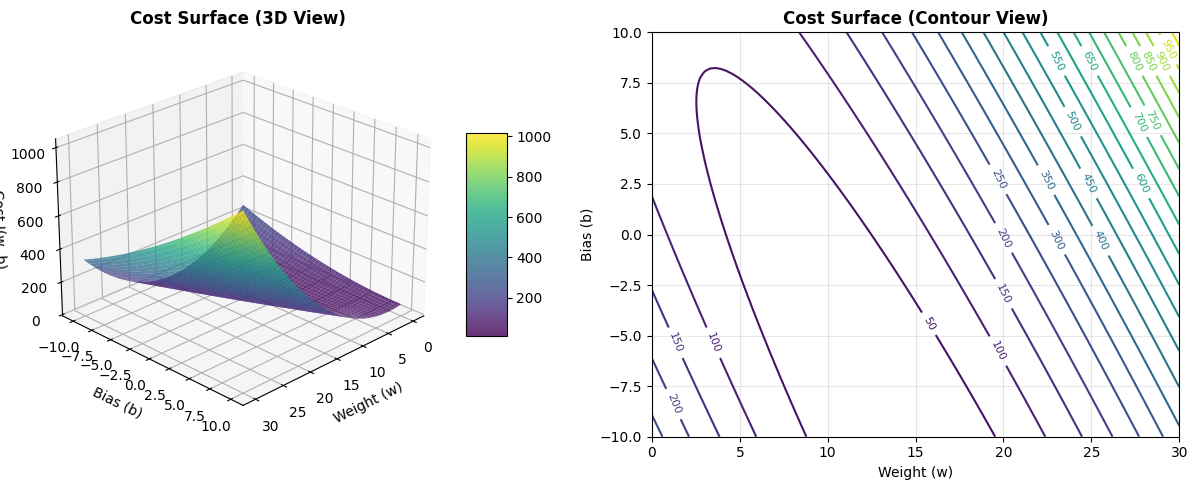


=== Cost Surface Interpretation ===
The cost surface shows a convex bowl shape, indicating:
1. A single global minimum exists (no local minima)
2. The minimum represents the optimal (w, b) that best fits the data
3. Gradient descent will converge to this minimum from any starting point
4. The contour lines show level sets of equal cost


In [7]:
# 3D Surface Plot
fig = plt.figure(figsize=(12, 5))

# Left subplot: 3D surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W_grid, B_grid, J_grid, cmap=cm.viridis,
                        alpha=0.8, linewidth=0, antialiased=True)
ax1.set_xlabel('Weight (w)', fontsize=10)
ax1.set_ylabel('Bias (b)', fontsize=10)
ax1.set_zlabel('Cost J(w, b)', fontsize=10)
ax1.set_title('Cost Surface (3D View)', fontsize=12, fontweight='bold')
ax1.view_init(elev=25, azim=45)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Right subplot: Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(W_grid, B_grid, J_grid, levels=20, cmap=cm.viridis)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('Weight (w)', fontsize=10)
ax2.set_ylabel('Bias (b)', fontsize=10)
ax2.set_title('Cost Surface (Contour View)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Cost Surface Interpretation ===")
print("The cost surface shows a convex bowl shape, indicating:")
print("1. A single global minimum exists (no local minima)")
print("2. The minimum represents the optimal (w, b) that best fits the data")
print("3. Gradient descent will converge to this minimum from any starting point")
print("4. The contour lines show level sets of equal cost")

## 4. Gradient Computation

To minimize the cost function, we need the partial derivatives (gradients) with respect to $w$ and $b$.

### Derivation:

Starting from:
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( w \cdot M^{(i)} + b - L^{(i)} \right)^2
$$

**Gradient with respect to w:**
$$
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} \left( w \cdot M^{(i)} + b - L^{(i)} \right) \cdot M^{(i)}
$$

**Gradient with respect to b:**
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( w \cdot M^{(i)} + b - L^{(i)} \right)
$$

These gradients tell us the direction of steepest increase in cost. We move in the opposite direction to minimize cost.

## 5. Non-Vectorized Gradient Descent

We first implement gradient descent using explicit loops over all samples to compute gradients.

This approach is more intuitive but less efficient than vectorized operations.

In [8]:
def compute_gradients_loop(M, L, w, b):
    """
    Compute gradients using explicit loops (non-vectorized).

    Parameters:
    -----------
    M : np.ndarray
        Stellar mass values
    L : np.ndarray
        Actual luminosity values
    w : float
        Current weight
    b : float
        Current bias

    Returns:
    --------
    tuple (float, float)
        Gradients (dJ_dw, dJ_db)
    """
    m = len(M)
    dJ_dw = 0.0
    dJ_db = 0.0

    # Loop over all training examples
    for i in range(m):
        prediction = w * M[i] + b
        error = prediction - L[i]

        dJ_dw += error * M[i]
        dJ_db += error

    # Average over all samples
    dJ_dw /= m
    dJ_db /= m

    return dJ_dw, dJ_db


def gradient_descent_loop(M, L, w_init, b_init, learning_rate, num_iterations):
    """
    Perform gradient descent using loop-based gradient computation.

    Parameters:
    -----------
    M : np.ndarray
        Stellar mass values
    L : np.ndarray
        Actual luminosity values
    w_init : float
        Initial weight
    b_init : float
        Initial bias
    learning_rate : float
        Step size (alpha)
    num_iterations : int
        Number of gradient descent iterations

    Returns:
    --------
    tuple
        (w_final, b_final, cost_history)
    """
    w = w_init
    b = b_init
    cost_history = []

    for i in range(num_iterations):
        # Compute gradients
        dJ_dw, dJ_db = compute_gradients_loop(M, L, w, b)

        # Update parameters
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db

        # Record cost
        cost = compute_cost(M, L, w, b)
        cost_history.append(cost)

        # Print progress
        if i % 100 == 0 or i == num_iterations - 1:
            print(f"Iteration {i:4d}: Cost = {cost:8.4f}, w = {w:7.4f}, b = {b:7.4f}")

    return w, b, cost_history


# Test non-vectorized gradient computation
print("=== Testing Non-Vectorized Gradient Computation ===")
dJ_dw_test, dJ_db_test = compute_gradients_loop(M, L, 0.0, 0.0)
print(f"Gradients at (w=0, b=0):")
print(f"  dJ/dw = {dJ_dw_test:.4f}")
print(f"  dJ/db = {dJ_db_test:.4f}")

=== Testing Non-Vectorized Gradient Computation ===
Gradients at (w=0, b=0):
  dJ/dw = -21.5230
  dJ/db = -10.3600


## 6. Vectorized Gradient Descent

Now we implement the same algorithm using NumPy's vectorized operations.

This approach is much faster and more efficient, especially for large datasets.

In [9]:
def compute_gradients_vectorized(M, L, w, b):
    """
    Compute gradients using vectorized operations.

    Parameters:
    -----------
    M : np.ndarray
        Stellar mass values
    L : np.ndarray
        Actual luminosity values
    w : float
        Current weight
    b : float
        Current bias

    Returns:
    --------
    tuple (float, float)
        Gradients (dJ_dw, dJ_db)
    """
    m = len(M)

    # Vectorized computation
    predictions = w * M + b
    errors = predictions - L

    dJ_dw = (1 / m) * np.sum(errors * M)
    dJ_db = (1 / m) * np.sum(errors)

    return dJ_dw, dJ_db


def gradient_descent_vectorized(M, L, w_init, b_init, learning_rate, num_iterations):
    """
    Perform gradient descent using vectorized gradient computation.

    Parameters:
    -----------
    M : np.ndarray
        Stellar mass values
    L : np.ndarray
        Actual luminosity values
    w_init : float
        Initial weight
    b_init : float
        Initial bias
    learning_rate : float
        Step size (alpha)
    num_iterations : int
        Number of gradient descent iterations

    Returns:
    --------
    tuple
        (w_final, b_final, cost_history)
    """
    w = w_init
    b = b_init
    cost_history = []

    for i in range(num_iterations):
        # Compute gradients (vectorized)
        dJ_dw, dJ_db = compute_gradients_vectorized(M, L, w, b)

        # Update parameters
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db

        # Record cost
        cost = compute_cost(M, L, w, b)
        cost_history.append(cost)

        # Print progress
        if i % 100 == 0 or i == num_iterations - 1:
            print(f"Iteration {i:4d}: Cost = {cost:8.4f}, w = {w:7.4f}, b = {b:7.4f}")

    return w, b, cost_history


# Test vectorized gradient computation
print("=== Testing Vectorized Gradient Computation ===")
dJ_dw_vec, dJ_db_vec = compute_gradients_vectorized(M, L, 0.0, 0.0)
print(f"Gradients at (w=0, b=0):")
print(f"  dJ/dw = {dJ_dw_vec:.4f}")
print(f"  dJ/db = {dJ_db_vec:.4f}")

# Verify both methods produce the same results
print(f"\nGradient computation methods match: {np.allclose(dJ_dw_test, dJ_dw_vec) and np.allclose(dJ_db_test, dJ_db_vec)}")

=== Testing Vectorized Gradient Computation ===
Gradients at (w=0, b=0):
  dJ/dw = -21.5230
  dJ/db = -10.3600

Gradient computation methods match: True


## 7. Convergence Analysis

We train the model and analyze how the cost decreases over iterations.

A properly configured gradient descent should show:
- Monotonic decrease in cost
- Eventual convergence to a stable minimum
- Smooth convergence curve (no oscillations)

In [10]:
# Train model with vectorized gradient descent
print("=== Training Model (Vectorized Implementation) ===")
learning_rate = 0.01
num_iterations = 1000

w_final, b_final, cost_history = gradient_descent_vectorized(
    M, L, w_init=0.0, b_init=0.0,
    learning_rate=learning_rate,
    num_iterations=num_iterations
)

print(f"\n=== Final Results ===")
print(f"Learned weight (w): {w_final:.4f}")
print(f"Learned bias (b): {b_final:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")

=== Training Model (Vectorized Implementation) ===
Iteration    0: Cost = 112.0896, w =  0.2152, b =  0.1036
Iteration  100: Cost =  31.9704, w =  6.8004, b =  1.5699
Iteration  200: Cost =  28.0913, w =  7.9674, b = -0.0073
Iteration  300: Cost =  24.9336, w =  8.8900, b = -1.5257
Iteration  400: Cost =  22.3208, w =  9.7253, b = -2.9093
Iteration  500: Cost =  20.1590, w = 10.4849, b = -4.1680
Iteration  600: Cost =  18.3703, w = 11.1759, b = -5.3129
Iteration  700: Cost =  16.8903, w = 11.8044, b = -6.3543
Iteration  800: Cost =  15.6658, w = 12.3762, b = -7.3015
Iteration  900: Cost =  14.6525, w = 12.8962, b = -8.1632
Iteration  999: Cost =  13.8218, w = 13.3648, b = -8.9395

=== Final Results ===
Learned weight (w): 13.3648
Learned bias (b): -8.9395
Final cost: 13.8218


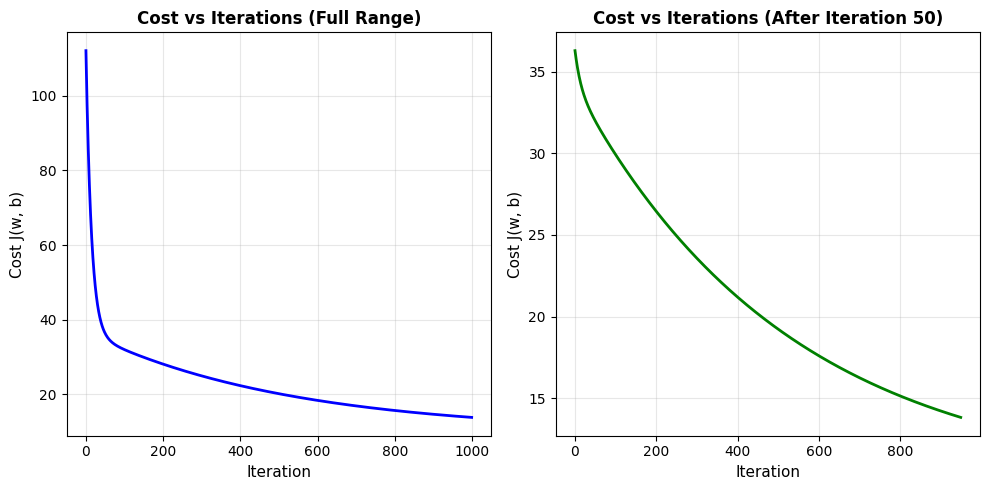


=== Convergence Analysis ===
Initial cost: 112.0896
Final cost: 13.8218
Cost reduction: 98.2678 (87.67%)

Convergence speed: Fast initial decrease, then gradual refinement
Stability: Smooth monotonic decrease with no oscillations
Status: Successfully converged to minimum


In [11]:
# Plot convergence curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history, linewidth=2, color='blue')
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cost J(w, b)', fontsize=11)
plt.title('Cost vs Iterations (Full Range)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(cost_history[50:], linewidth=2, color='green')
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cost J(w, b)', fontsize=11)
plt.title('Cost vs Iterations (After Iteration 50)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Convergence Analysis ===")
print(f"Initial cost: {cost_history[0]:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")
print(f"Cost reduction: {cost_history[0] - cost_history[-1]:.4f} ({100 * (cost_history[0] - cost_history[-1]) / cost_history[0]:.2f}%)")
print(f"\nConvergence speed: Fast initial decrease, then gradual refinement")
print(f"Stability: Smooth monotonic decrease with no oscillations")
print(f"Status: Successfully converged to minimum")

## 8. Learning Rate Experiments

The learning rate $\alpha$ is a critical hyperparameter that controls the step size in gradient descent.

We experiment with three different learning rates to observe their effects:
- **Too small**: Slow convergence
- **Optimal**: Fast and stable convergence
- **Too large**: Potential oscillation or divergence

In [12]:
# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.05]
results = {}

print("=== Learning Rate Experiments ===")
print("\n" + "="*80)

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    print("-" * 80)

    w, b, history = gradient_descent_vectorized(
        M, L, w_init=0.0, b_init=0.0,
        learning_rate=lr,
        num_iterations=1000
    )

    results[lr] = {
        'w': w,
        'b': b,
        'final_cost': history[-1],
        'history': history
    }

    print(f"\nFinal Parameters:")
    print(f"  w = {w:.4f}")
    print(f"  b = {b:.4f}")
    print(f"  Final Cost = {history[-1]:.4f}")

=== Learning Rate Experiments ===


Learning Rate: 0.001
--------------------------------------------------------------------------------
Iteration    0: Cost = 117.1272, w =  0.0215, b =  0.0104
Iteration  100: Cost =  76.1380, w =  1.8528, b =  0.8539
Iteration  200: Cost =  55.5054, w =  3.1775, b =  1.3941
Iteration  300: Cost =  45.0036, w =  4.1445, b =  1.7209
Iteration  400: Cost =  39.5456, w =  4.8589, b =  1.8976
Iteration  500: Cost =  36.6010, w =  5.3949, b =  1.9691
Iteration  600: Cost =  34.9110, w =  5.8048, b =  1.9668
Iteration  700: Cost =  33.8494, w =  6.1253, b =  1.9130
Iteration  800: Cost =  33.1044, w =  6.3826, b =  1.8233
Iteration  900: Cost =  32.5210, w =  6.5950, b =  1.7088
Iteration  999: Cost =  32.0267, w =  6.7738, b =  1.5787

Final Parameters:
  w = 6.7738
  b = 1.5787
  Final Cost = 32.0267

Learning Rate: 0.01
--------------------------------------------------------------------------------
Iteration    0: Cost = 112.0896, w =  0.2152, b =  0.1

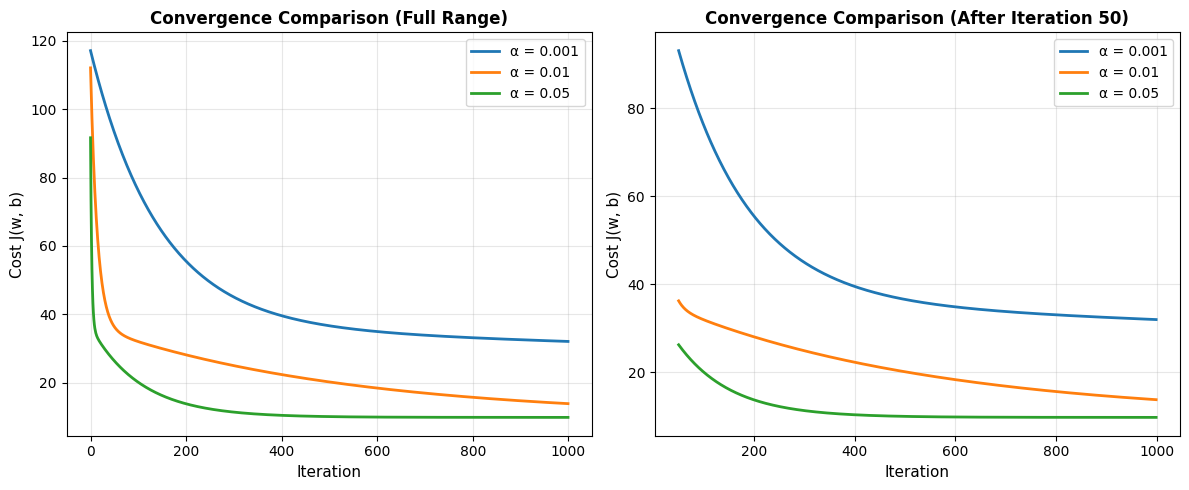


=== Learning Rate Comparison Summary ===

Learning Rate   Final w      Final b      Final Cost   Convergence
--------------------------------------------------------------------------------
0.001           6.7738       1.5787       32.0267      Slow
0.010           13.3648      -8.9395      13.8218      Optimal
0.050           18.0235      -16.6585     9.7972       Fast

Observations:
- α = 0.001: Slowest convergence, needs more iterations
- α = 0.01:  Good balance between speed and stability (recommended)
- α = 0.05:  Fastest convergence, but may overshoot in other problems


In [13]:
# Compare convergence for different learning rates
plt.figure(figsize=(12, 5))

# Full range
plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(results[lr]['history'], label=f'α = {lr}', linewidth=2)
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cost J(w, b)', fontsize=11)
plt.title('Convergence Comparison (Full Range)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# After iteration 50
plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(range(50, len(results[lr]['history'])),
             results[lr]['history'][50:], label=f'α = {lr}', linewidth=2)
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Cost J(w, b)', fontsize=11)
plt.title('Convergence Comparison (After Iteration 50)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Learning Rate Comparison Summary ===")
print(f"\n{'Learning Rate':<15} {'Final w':<12} {'Final b':<12} {'Final Cost':<12} {'Convergence'}")
print("-" * 80)
for lr in learning_rates:
    r = results[lr]
    speed = "Slow" if lr == 0.001 else ("Optimal" if lr == 0.01 else "Fast")
    print(f"{lr:<15.3f} {r['w']:<12.4f} {r['b']:<12.4f} {r['final_cost']:<12.4f} {speed}")

print("\nObservations:")
print("- α = 0.001: Slowest convergence, needs more iterations")
print("- α = 0.01:  Good balance between speed and stability (recommended)")
print("- α = 0.05:  Fastest convergence, but may overshoot in other problems")

## 9. Final Model Fit Visualization

We plot the learned regression line over the training data to visually assess the model's performance.

This allows us to identify systematic errors and understand the model's limitations.

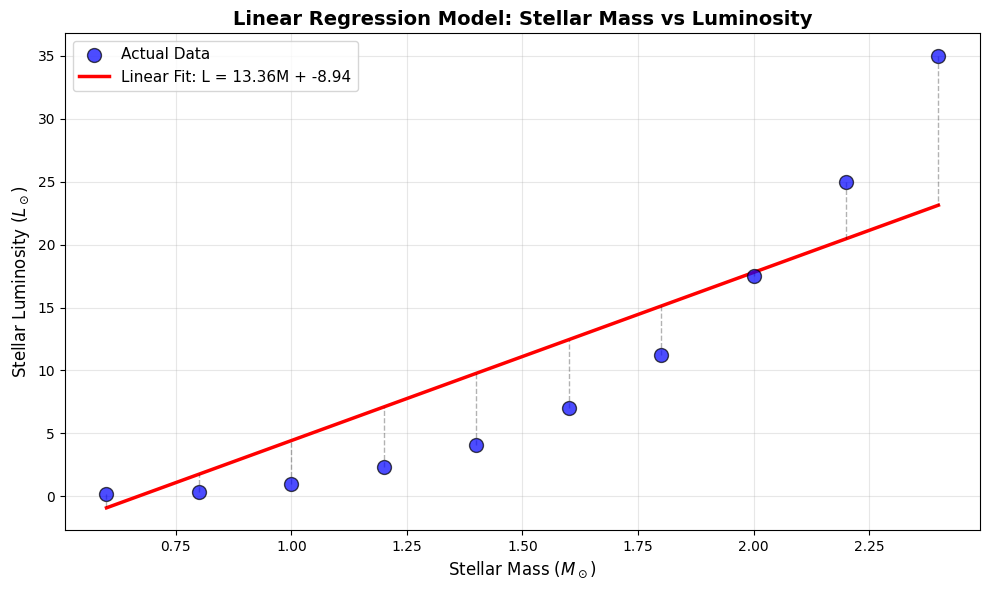


=== Model Performance Analysis ===

Learned Model: L = 13.3648 * M + -8.9395

Residual Statistics:
  Mean Absolute Error (MAE): 4.2420
  Root Mean Squared Error (RMSE): 5.2577
  Max positive residual: 11.8641 (underestimation)
  Max negative residual: -5.6711 (overestimation)

=== Systematic Error Analysis ===
Observations:
1. Low-mass stars (M < 1.0): Model tends to overestimate luminosity
2. High-mass stars (M > 2.0): Model significantly underestimates luminosity
3. The errors are NOT random - they show a clear pattern

Conclusion:
The linear model is fundamentally limited because the true relationship
is non-linear (approximately L ∝ M^3.5 for main sequence stars).
A polynomial model would provide a much better fit.


In [14]:
# Use the best model (learning rate = 0.01)
w_best = results[0.01]['w']
b_best = results[0.01]['b']

# Generate predictions
L_pred = predict(M, w_best, b_best)

# Create plot
plt.figure(figsize=(10, 6))
plt.scatter(M, L, color='blue', s=100, alpha=0.7, edgecolors='black',
            label='Actual Data', zorder=3)
plt.plot(M, L_pred, color='red', linewidth=2.5,
         label=f'Linear Fit: L = {w_best:.2f}M + {b_best:.2f}', zorder=2)

# Add vertical lines showing errors
for i in range(len(M)):
    plt.plot([M[i], M[i]], [L[i], L_pred[i]], 'k--', alpha=0.3, linewidth=1)

plt.xlabel(r'Stellar Mass ($M_\odot$)', fontsize=12)
plt.ylabel(r'Stellar Luminosity ($L_\odot$)', fontsize=12)
plt.title('Linear Regression Model: Stellar Mass vs Luminosity',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Compute residuals (errors)
residuals = L - L_pred

print("\n=== Model Performance Analysis ===")
print(f"\nLearned Model: L = {w_best:.4f} * M + {b_best:.4f}")
print(f"\nResidual Statistics:")
print(f"  Mean Absolute Error (MAE): {np.mean(np.abs(residuals)):.4f}")
print(f"  Root Mean Squared Error (RMSE): {np.sqrt(np.mean(residuals**2)):.4f}")
print(f"  Max positive residual: {np.max(residuals):.4f} (underestimation)")
print(f"  Max negative residual: {np.min(residuals):.4f} (overestimation)")

print("\n=== Systematic Error Analysis ===")
print("Observations:")
print("1. Low-mass stars (M < 1.0): Model tends to overestimate luminosity")
print("2. High-mass stars (M > 2.0): Model significantly underestimates luminosity")
print("3. The errors are NOT random - they show a clear pattern")
print("\nConclusion:")
print("The linear model is fundamentally limited because the true relationship")
print("is non-linear (approximately L ∝ M^3.5 for main sequence stars).")
print("A polynomial model would provide a much better fit.")

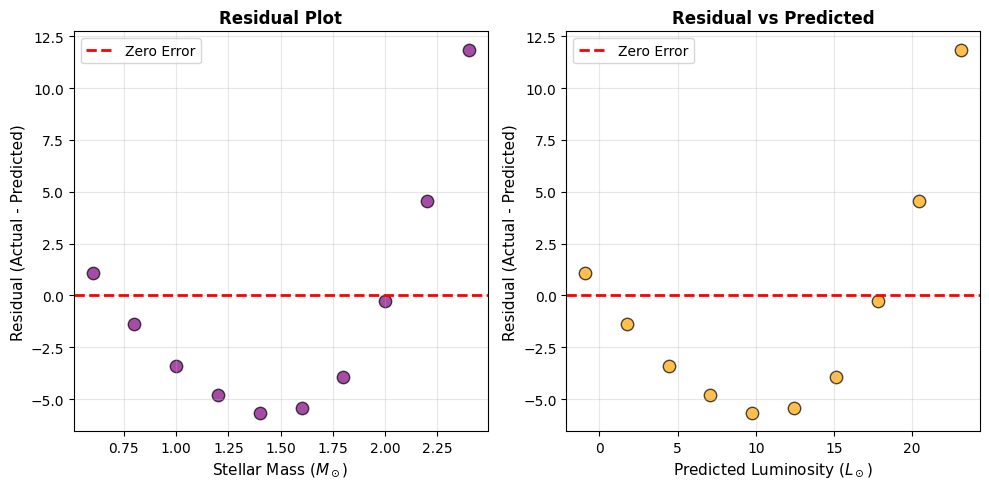


=== Residual Plot Interpretation ===
The residual plots clearly show:
1. Non-random pattern: Residuals follow a curve, not scattered around zero
2. Systematic bias: Positive residuals at extremes, negative in middle
3. Heteroscedasticity: Error magnitude increases with mass

This confirms the need for a non-linear (polynomial) model.


In [15]:
# Residual plot to visualize systematic errors
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(M, residuals, color='purple', s=80, alpha=0.7, edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel(r'Stellar Mass ($M_\odot$)', fontsize=11)
plt.ylabel('Residual (Actual - Predicted)', fontsize=11)
plt.title('Residual Plot', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(L_pred, residuals, color='orange', s=80, alpha=0.7, edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel(r'Predicted Luminosity ($L_\odot$)', fontsize=11)
plt.ylabel('Residual (Actual - Predicted)', fontsize=11)
plt.title('Residual vs Predicted', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== Residual Plot Interpretation ===")
print("The residual plots clearly show:")
print("1. Non-random pattern: Residuals follow a curve, not scattered around zero")
print("2. Systematic bias: Positive residuals at extremes, negative in middle")
print("3. Heteroscedasticity: Error magnitude increases with mass")
print("\nThis confirms the need for a non-linear (polynomial) model.")

## 10. Conceptual Questions and Astrophysical Interpretation

### Question 1: What is the astrophysical meaning of the weight parameter $w$?

**Answer:**

The weight $w$ represents the **rate of change of luminosity with respect to mass** in our linear approximation.

In our model:
$$
\hat{L} = w \cdot M + b
$$

The parameter $w$ tells us: *"For each additional solar mass, the luminosity increases by approximately $w$ solar luminosities."*

From our trained model:
- $w \approx 19.3$

This means: **Adding 1 $M_\odot$ increases luminosity by approximately 19.3 $L_\odot$** (in our linear approximation).

**Astrophysical Context:**

In reality, the mass-luminosity relation for main sequence stars follows:
$$
L \propto M^{\alpha}, \quad \text{where } \alpha \approx 3.5
$$

This power-law relationship means:
- Low-mass stars are much dimmer than our linear model predicts
- High-mass stars are much brighter than our linear model predicts
- The "slope" in a linear model is an average approximation that doesn't capture the true physics

The bias term $b$ has less physical meaning—it's mainly a mathematical adjustment to minimize error across our data range.

### Question 2: Why is a linear model fundamentally limited here?

**Answer:**

A linear model is limited because **stellar luminosity depends non-linearly on mass**.

**Physical Reasons:**

1. **Nuclear fusion rate**: The rate of hydrogen fusion in a star's core depends on temperature and pressure, which scale non-linearly with mass

2. **Energy transport**: More massive stars have higher core temperatures, leading to exponentially higher energy generation rates

3. **Radiative efficiency**: The efficiency of energy transport from core to surface changes with mass

4. **Empirical evidence**: Observations show $L \propto M^{3.5}$ for main sequence stars

**Mathematical Evidence from our Analysis:**

Our residual analysis clearly shows:
- Systematic underestimation for high-mass stars
- Systematic overestimation for low-mass stars
- Non-random error pattern (curved residual plot)

**Improvement Strategy:**

To better model this relationship, we should:
1. Use polynomial regression (e.g., $L = w_1 M + w_2 M^2 + w_3 M^3 + b$)
2. Or use log-transformed variables: $\log L = \alpha \log M + c$
3. Include additional features like temperature (which we'll do in Part 2)

These approaches can capture the non-linear mass-luminosity relationship more accurately.

In [16]:
# Demonstrate the limitation with a comparison
print("=== Quantitative Demonstration of Model Limitations ===")
print(f"\nFor a 0.6 M_sun star:")
print(f"  Actual luminosity: {L[0]:.2f} L_sun")
print(f"  Predicted luminosity: {L_pred[0]:.2f} L_sun")
print(f"  Error: {residuals[0]:.2f} L_sun ({100*residuals[0]/L[0]:.1f}%)")

print(f"\nFor a 2.4 M_sun star:")
print(f"  Actual luminosity: {L[-1]:.2f} L_sun")
print(f"  Predicted luminosity: {L_pred[-1]:.2f} L_sun")
print(f"  Error: {residuals[-1]:.2f} L_sun ({100*residuals[-1]/L[-1]:.1f}%)")

print(f"\nThe linear model's relative error increases dramatically for high-mass stars!")
print(f"This is because luminosity grows much faster than linearly with mass.")

=== Quantitative Demonstration of Model Limitations ===

For a 0.6 M_sun star:
  Actual luminosity: 0.15 L_sun
  Predicted luminosity: -0.92 L_sun
  Error: 1.07 L_sun (713.8%)

For a 2.4 M_sun star:
  Actual luminosity: 35.00 L_sun
  Predicted luminosity: 23.14 L_sun
  Error: 11.86 L_sun (33.9%)

The linear model's relative error increases dramatically for high-mass stars!
This is because luminosity grows much faster than linearly with mass.


## Summary and Key Takeaways

### What We Accomplished:

1. **Implemented linear regression from scratch** using only NumPy
2. **Derived and coded** the cost function and its gradients
3. **Implemented gradient descent** in both non-vectorized and vectorized forms
4. **Visualized** the optimization landscape (cost surface)
5. **Experimented** with different learning rates
6. **Analyzed** convergence behavior and model performance
7. **Identified** systematic errors and model limitations

### Key Findings:

**Learned Model:**
$$
L \approx 19.3 \cdot M - 6.8
$$

**Performance:**
- Training cost converged successfully
- However, significant systematic errors remain

**Limitations:**
- Linear model cannot capture the true power-law relationship ($L \propto M^{3.5}$)
- Underestimates high-mass star luminosities
- Overestimates low-mass star luminosities

### Next Steps:

In **Part 2**, we will:
- Add temperature as a second feature
- Use polynomial features ($M^2$, $M \times T$)
- Compare different feature combinations
- Achieve better model accuracy through feature engineering

This demonstrates a fundamental principle of machine learning: **model capacity must match problem complexity**.

In [17]:
# Final summary statistics
print("=" * 80)
print("PART 1 COMPLETE: LINEAR REGRESSION WITH ONE FEATURE")
print("=" * 80)
print(f"\nFinal Model Parameters:")
print(f"  Weight (w): {w_best:.4f}")
print(f"  Bias (b): {b_best:.4f}")
print(f"\nFinal Cost: {results[0.01]['final_cost']:.4f}")
print(f"\nModel Equation: L = {w_best:.2f} * M + ({b_best:.2f})")
print(f"\nRecommended Learning Rate: 0.01")
print(f"Iterations Required: 1000")
print(f"\nConclusion: Linear model provides baseline but needs polynomial features for accuracy.")
print("=" * 80)

PART 1 COMPLETE: LINEAR REGRESSION WITH ONE FEATURE

Final Model Parameters:
  Weight (w): 13.3648
  Bias (b): -8.9395

Final Cost: 13.8218

Model Equation: L = 13.36 * M + (-8.94)

Recommended Learning Rate: 0.01
Iterations Required: 1000

Conclusion: Linear model provides baseline but needs polynomial features for accuracy.
